In [401]:
import numpy as np
import pandas as pd
import seaborn as sns 

In [402]:
data = pd.read_excel("C:/Users/wkaco/Desktop/iobr.xlsx")

In [403]:
data["SPREAD_SOFR"] = data["EFFR"]-data['SOFR']

In [404]:
data

,DATE,IOBR,SOFR,EFFR,DEPOSITS OF BANKS IN FED,TGA,COMMERCIAL BANKS A/L,SPREAD_SOFR
0,2021-08-04 00:00:00,0.15,0.000,0.10,4005.578,492.668,8235073.0,0.100
1,2021-08-05 00:00:00,0.15,0.050,0.10,NaN,NaN,NaN,0.050
2,2021-08-06 00:00:00,0.15,0.050,0.10,NaN,NaN,NaN,0.050
3,2021-08-09 00:00:00,0.15,0.050,0.10,NaN,NaN,NaN,0.050
4,2021-08-10 00:00:00,0.15,0.050,0.10,NaN,NaN,NaN,0.050
...,...,...,...,...,...,...,...,...
884,2024-12-24 00:00:00,4.40,4.400,4.33,NaN,NaN,NaN,-0.070
885,45651,4.40,4.465,4.33,3247.382,764.770,6885963.0,-0.135
886,45652,4.40,4.530,4.33,NaN,NaN,NaN,-0.200
887,45653,4.40,4.460,4.33,NaN,NaN,NaN,-0.130


In [405]:
data["SPREAD_SOFR"] = (data["SPREAD_SOFR"] > 0).astype(int)
data

,DATE,IOBR,SOFR,EFFR,DEPOSITS OF BANKS IN FED,TGA,COMMERCIAL BANKS A/L,SPREAD_SOFR
0,2021-08-04 00:00:00,0.15,0.000,0.10,4005.578,492.668,8235073.0,1
1,2021-08-05 00:00:00,0.15,0.050,0.10,NaN,NaN,NaN,1
2,2021-08-06 00:00:00,0.15,0.050,0.10,NaN,NaN,NaN,1
3,2021-08-09 00:00:00,0.15,0.050,0.10,NaN,NaN,NaN,1
4,2021-08-10 00:00:00,0.15,0.050,0.10,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...
884,2024-12-24 00:00:00,4.40,4.400,4.33,NaN,NaN,NaN,0
885,45651,4.40,4.465,4.33,3247.382,764.770,6885963.0,0
886,45652,4.40,4.530,4.33,NaN,NaN,NaN,0
887,45653,4.40,4.460,4.33,NaN,NaN,NaN,0


In [406]:
data["TGA"] = data["TGA"].interpolate()
data["DEPOSITS  OF BANKS IN FED"] = data["DEPOSITS  OF BANKS IN FED"].interpolate()
data["COMMERCIAL BANKS A/L"] = data["COMMERCIAL BANKS A/L"].interpolate()

In [407]:
sofr = data["SPREAD_SOFR"]

In [408]:
data = data[["TGA","DEPOSITS  OF BANKS IN FED", "COMMERCIAL BANKS A/L"]]

In [365]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [413]:
y = pd.DataFrame(sofr.shift(1).dropna()) #or data["SPREAD_EFFR"]
X = pd.DataFrame(((data - data.shift(1)) / data.shift(1))).dropna()


In [414]:
y

,SPREAD_SOFR
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
...,...
884,1.0
885,0.0
886,0.0
887,0.0


In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [423]:
from sklearn.linear_model import LogisticRegression

In [424]:
model = LogisticRegression()

In [425]:
model.fit(X_train, y_train)

c:\Users\wkaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [426]:
predictions = model.predict(X_test)

In [427]:
from sklearn import metrics

In [428]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        68
         1.0       0.85      1.00      0.92       376

    accuracy                           0.85       444
   macro avg       0.42      0.50      0.46       444
weighted avg       0.72      0.85      0.78       444



c:\Users\wkaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wkaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wkaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [429]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
knn = KNeighborsClassifier(n_neighbors =1)

In [431]:
knn.fit(X_train, y_train)

c:\Users\wkaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [432]:
from sklearn.metrics import classification_report, confusion_matrix
prediction = knn.predict(X_test)

In [433]:
print(confusion_matrix(y_test, prediction))

[[ 47  21]
 [ 19 357]]


In [440]:
error_rate = []

for i in range(1, 444):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

c:\Users\wkaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: Unable to coerce to Series, length must be 1: given 444

ValueError: x and y must have same first dimension, but have shapes (39,) and (0,)

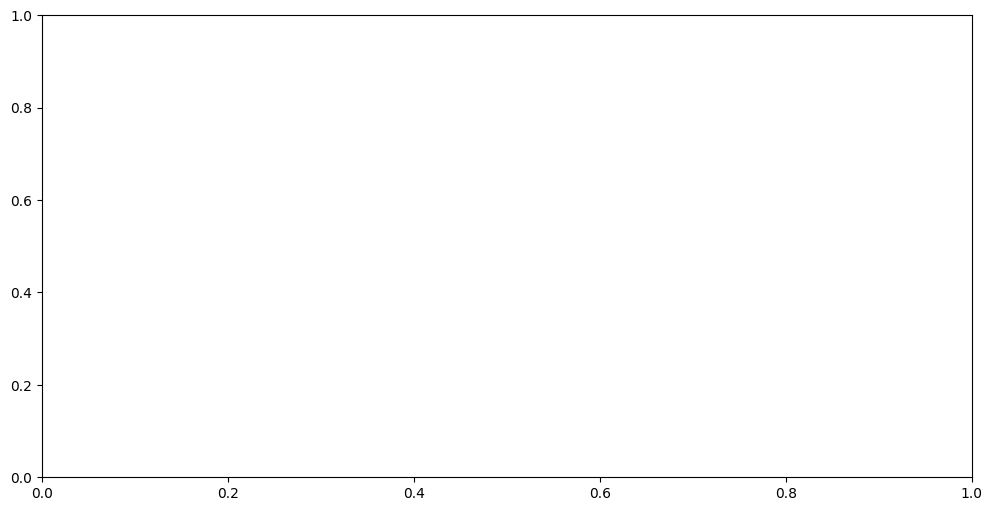

In [438]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error_rate)